# Study of the probability of a change in the exchange rate of the dollar against the Georgian lari

Loading the required libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm
import numpy as np
import seaborn as sb

Download the history of exchange rate changes since 2015. Source https://www.investing.com/

In [42]:
data = pd.read_csv('USD_GEL Historical Data.csv')
data

,Date,Price,Open,High,Low,Change %
0,"Jul 01, 2022",2.8700,2.9375,2.9400,2.8700,-1.71%
1,"Jun 30, 2022",2.9200,2.9325,2.9425,2.9325,0.17%
2,"Jun 29, 2022",2.9150,2.9325,2.9400,2.9325,-0.85%
3,"Jun 28, 2022",2.9400,2.9275,2.9402,2.9275,1.03%
4,"Jun 27, 2022",2.9100,2.9275,2.9427,2.9260,0.00%
...,...,...,...,...,...,...
1952,"Jan 07, 2015",1.8929,1.8929,1.8929,1.8929,0.00%
1953,"Jan 06, 2015",1.8929,1.8778,1.8937,1.8777,0.81%
1954,"Jan 05, 2015",1.8777,1.8787,1.8787,1.8777,-0.27%
1955,"Jan 02, 2015",1.8827,1.8827,1.8827,1.8827,0.00%


Let's add the exchange rate change for the week to the table

In [43]:
for s in range(1950):
    data.loc[s, 'Week_Change'] = (data.loc[s, 'Price'] - data.loc[s + 7, 'Price']) / data.loc[s + 7, 'Price']
    
data = data[data.index < 1949]
data.head().style.format({'Week_Change': '{:.2%}'})

,Date,Price,Open,High,Low,Change %,Week_Change
0,"Jul 01, 2022",2.870000,2.937500,2.940000,2.870000,-1.71%,0.00%
1,"Jun 30, 2022",2.920000,2.932500,2.942500,2.932500,0.17%,1.92%
2,"Jun 29, 2022",2.915000,2.932500,2.940000,2.932500,-0.85%,1.57%
3,"Jun 28, 2022",2.940000,2.927500,2.940200,2.927500,1.03%,1.82%
4,"Jun 27, 2022",2.910000,2.927500,2.942700,2.926000,0.00%,1.04%


Let's build a histogram, we see a normal distribution

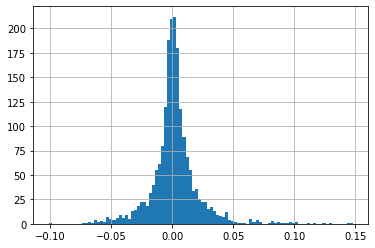

In [44]:
data['Week_Change'].hist(bins = 100);

Average exchange rate change close to zero

In [86]:
print(data['Week_Change'].mean(), data['Week_Change'].std(), data['Week_Change'].median())

0.001743839858119606 0.020416965489248158 0.0009324009324008297


In [95]:
change1 = - 1
change2 = - 0.03
probability = data[data['Week_Change'] < change2][data['Week_Change'] > change1]['Week_Change'].count() / data['Week_Change'].count()

print('The probability of the dollar falling below {:.0%} percent is about {:.3f}'.format(- change2, probability))

The probability of the dollar falling below 3% percent is about 0.046


C:\Users\79110\AppData\Local\Temp\ipykernel_13512\3862352732.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  probability = data[data['Week_Change'] < change2][data['Week_Change'] > change1]['Week_Change'].count() / data['Week_Change'].count()
